<a href="https://colab.research.google.com/github/gabrielefrn/qc-minicourse/blob/main/Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

09/04/2024

In [1]:
!pip install numpy
!pip install git+https://github.com/qiboteam/qiboedu
!pip install qibo

  Cloning https://github.com/qiboteam/qiboedu to /tmp/pip-req-build-379ex5bg
  Running command git clone --filter=blob:none --quiet https://github.com/qiboteam/qiboedu /tmp/pip-req-build-379ex5bg
  Resolved https://github.com/qiboteam/qiboedu to commit 5de265148000f4e13217a16b535d14ca0b7e3d4a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 13.0 MB/s eta 0:00:00
  Created wheel for qiboedu: filename=qiboedu-0.1.0-py3-none-any.whl size=166

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import qibo
from qibo import Circuit, gates

from qiboedu.scripts import utils, plotscripts

print(qibo.get_backend())

[Qibo 0.2.7|INFO|2024-04-09 18:30:59]: Using qibojit (numba) backend on /CPU:0
INFO:qibo.config:Using qibojit (numba) backend on /CPU:0


qibojit (numba)


In [2]:
#define dimensionality
n = 5

#number of shots = circuit executions
nshots = 100000


bitstrings = utils.generate_bitstring_combinations(n)

print(bitstrings)

['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']


In [3]:
#check if the lenght list is equal to 2^n

print(2**n)
print(len(bitstrings))

32
32


In [4]:
!pip install Faker

from faker import Faker

fake = Faker()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00


In [5]:
#generate 2^n names with faker.name

names = []

for i in range(2**n):
  names.append(fake.name())
print(names)

['Brenda Franco', 'Donald Martinez', 'Thomas Hess', 'Stephen Bright', 'Thomas Johnson', 'Daniel Long', 'Robert Herring', 'Kathryn Mahoney', 'Charles Diaz', 'Ryan Booth', 'Seth Hunter', 'Danny Pace', 'Alicia Osborne', 'Caroline Jackson', 'Tammy Fowler', 'Terri Taylor', 'Andrew James', 'Paula Skinner', 'John Buckley', 'Jacob Cole', 'Amanda Camacho', 'Benjamin Jones', 'Michelle Hale', 'Mr. Scott Lowe', 'Mary Oconnell', 'Kristie Dunn', 'Laura Pineda', 'Mary Copeland', 'Sean Stevens', 'Justin Ritter', 'Eric Thornton', 'Amber Rodriguez']


Assuming the guilty gut is in position 11:

In [6]:
#set the guilty index

guilty_index = 11

print(f"Guilty index: {guilty_index}")
print(f"Guilty {names[guilty_index]} corresponding to state {bitstrings[guilty_index]}")

Guilty index: 11
Gulty Danny Pace corresponding to state 01011


In [7]:
#building the inigtial and final layer

def build_initial_layer(n):
  #building the initial superposition in grover circuit

  # n + 1 qubits
  c = Circuit(n+1)

  #state preparation
  c.add(gates.X(n))

  for q in range(n+1):
    c.add(gates.H(q))

  return c

#write a function to build a circuit containing the final measurements

def build_final_layer(n):
  c = Circuit(n+1)
  c.add(gates.M(*range(n)))

  return c

In [8]:
#build the circuit as initial layer + final layer and draw it

c = build_initial_layer(n) + build_final_layer(n)

print(c.draw())

q0: ─H───M─
q1: ─H───M─
q2: ─H───M─
q3: ─H───M─
q4: ─H───M─
q5: ─X─H───


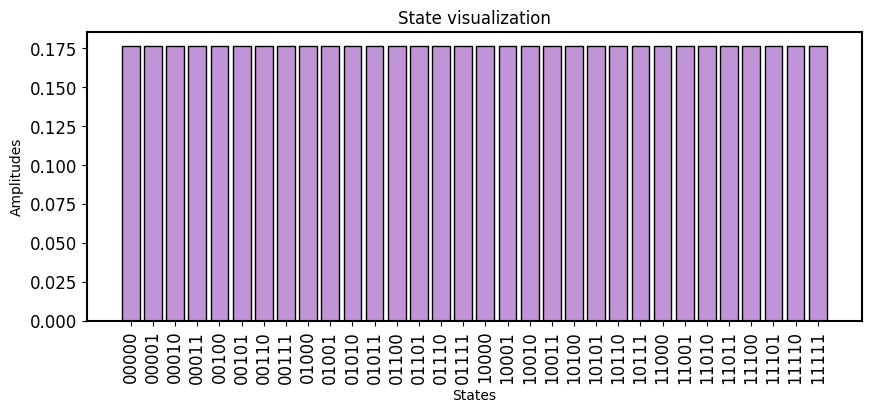

In [9]:
plotscripts.plot_input_register_amplitudes(c().state())

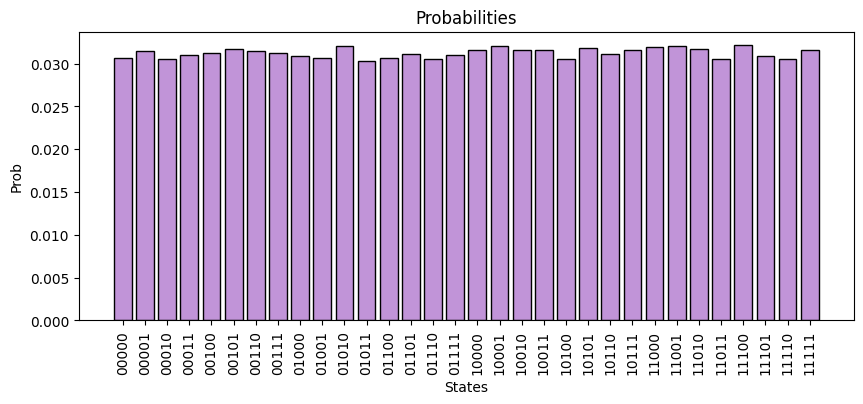

In [10]:
plotscripts.plot_grover_probabilities(c, nshots)

#fluctuatinons due to noise

In [16]:
#define a function which implements the oracle given guilty_index

def build_oracle(guilty_index, n):
  bitstring = bitstrings[guilty_index]
  circuit = Circuit(n+1)
  zeros = []

  for i, bit in enumerate(bitstring):
    if bit == '0':
      zeros.append(i)
  [circuit.add(gates.X(q) for q in zeros)] #target state acts like 111111

  circuit.add(gates.X(q=n).controlled_by(*range(n)))

  [circuit.add(gates.X(q)) for q in zeros]

  return circuit

In [17]:
c = build_oracle(guilty_index, n)
print(c.draw())

q0: ─X─o─X─
q1: ───o───
q2: ─X─o─X─
q3: ───o───
q4: ───o───
q5: ───X───


In [18]:
c = build_initial_layer(n) + build_oracle(guilty_index, n) + build_final_layer(n)

print(c.draw())

q0: ─H─X─o─X─M─
q1: ─H───o───M─
q2: ─H─X─o─X─M─
q3: ─H───o───M─
q4: ─H───o───M─
q5: ─X─H─X─────


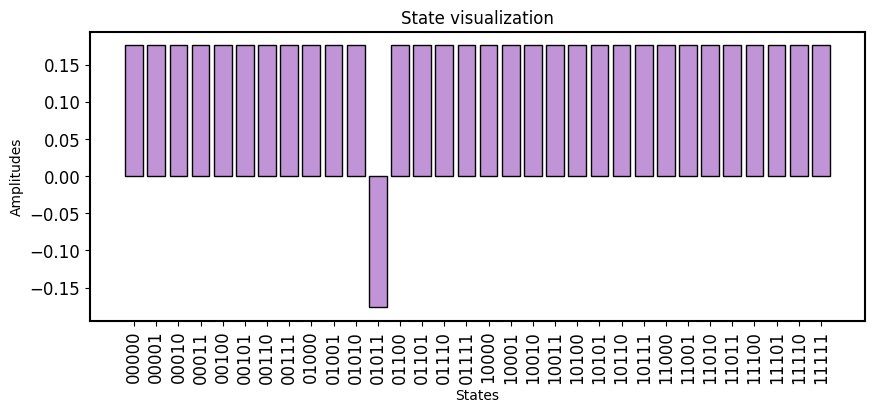

In [22]:
plotscripts.plot_input_register_amplitudes(c().state())

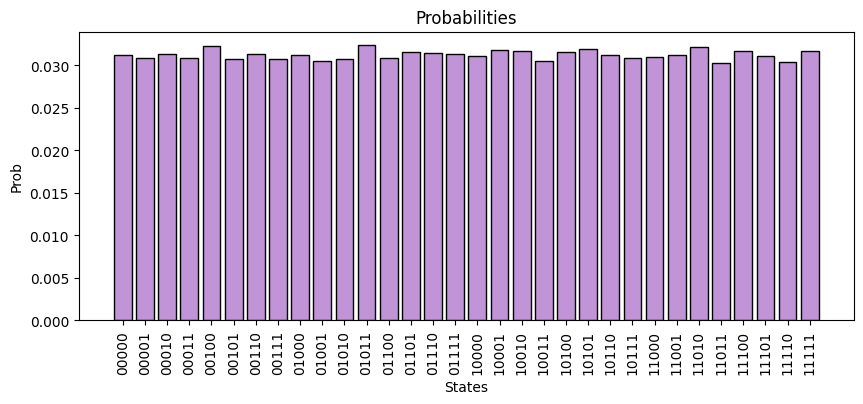

In [24]:
plotscripts.plot_grover_probabilities(c, nshots)

In [25]:
#implement the diffusion operator

def build_diffusion_operator(n):
  circuit = Circuit(n+1)
  circuit.add(gates.X(n))

  for q in range(n):
    circuit.add(gates.H(q))
    circuit.add(gates.X(q))
  circuit.add(gates.X(q=n).controlled_by(*range(n)))

  for q in range(n):
    circuit.add(gates.X(q))
    circuit.add(gates.H(q))

  return circuit

In [26]:
# function to apply nsteps of grover

def build_grover(n, nsteps):
  c = Circuit(n+1)

  #apply the initial layer

  c += build_initial_layer(n)

  for _ in range(nsteps):
    c += build_oracle(guilty_index, n)
    c += build_diffusion_operator(n)

  c += build_final_layer(n)

  return c

In [28]:
#build grover circuit with nsteps = 1

c = build_grover(n, 1)

#draw the circuit
print(c.draw())

q0: ─H─X─o─X─H─X─o─X─H─M─
q1: ─H───o─H─X───o─X─H─M─
q2: ─H─X─o─X─H─X─o─X─H─M─
q3: ─H───o─H─X───o─X─H─M─
q4: ─H───o─H─X───o─X─H─M─
q5: ─X─H─X─X─────X───────


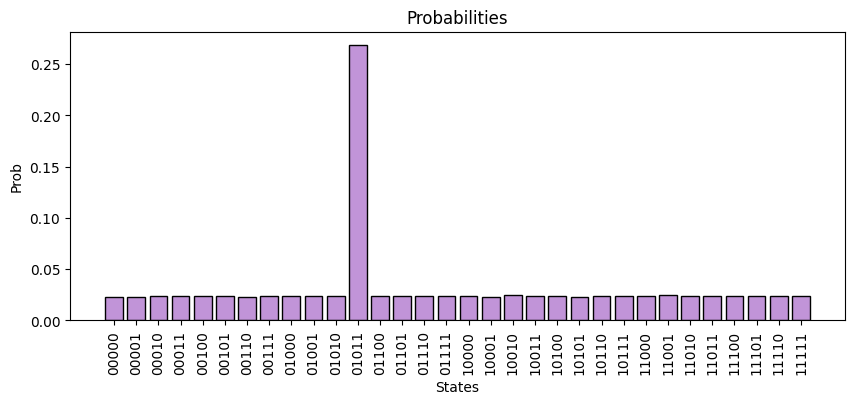

In [29]:
plotscripts.plot_grover_probabilities(c, nshots)

In [30]:
#build grover circuit with nsteps = 2

c = build_grover(n, 2)

#draw
print(c.draw())

q0: ─H─X─o─X─H─X─o─X─H─X─o─X─H─X─o─X─H─M─
q1: ─H───o─H─X───o─X─H───o─H─X───o─X─H─M─
q2: ─H─X─o─X─H─X─o─X─H─X─o─X─H─X─o─X─H─M─
q3: ─H───o─H─X───o─X─H───o─H─X───o─X─H─M─
q4: ─H───o─H─X───o─X─H───o─H─X───o─X─H─M─
q5: ─X─H─X─X─────X───────X─X─────X───────


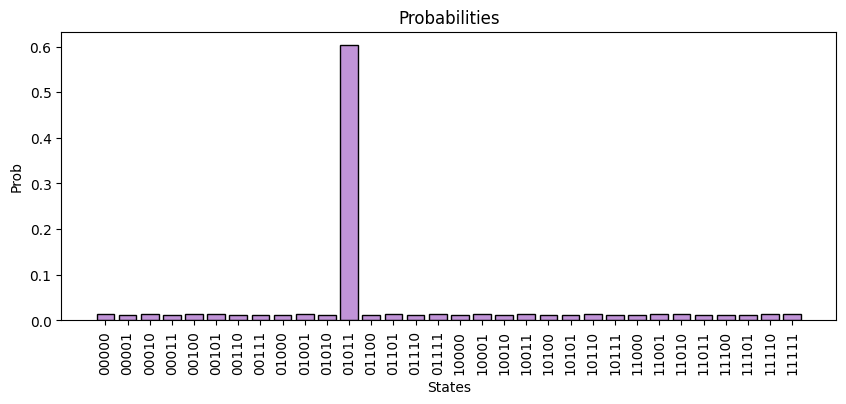

In [31]:
plotscripts.plot_grover_probabilities(c, nshots)

In [38]:
#collect the frequencies

frequencies = c(nshots=1000).frequencies()

#write the corresponding probabilities dividing by nshots
probabilities = []
for bitstrings in frequencies:
  probabilities.append(frequencies[bitstrings]/1000)

#save index corresponding to max probability and show the corresponding name
index = np.argmax(probabilities)

print(index)

11


In [39]:
#compute de optimal number of iteratuins
opt = (np.pi/4) * np.sqrt(2**n)
print(opt)

4.442882938158366


In [ ]:
#allocate empty max probabilities list
prob_target = []

#set the number of experiments
N = 10

#check for number of steps in np.arange(0, nsteps)
for i in range(N):
  c = build_grover(n, i)
  prob_target.append